In [1]:
import PyComplexHeatmap as pch
from PyComplexHeatmap import *
from matplotlib.backends.backend_pdf import PdfPages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi']=300
plt.rcParams['pdf.fonttype']=42

In [2]:
all_fps = [
        '/home/qzeng_salk_edu/project/241207_zhwu_ml/aging-gene-prediction/ml_output/Oligo_NN/result.csv',
        '/home/qzeng_salk_edu/project/241207_zhwu_ml/aging-gene-prediction/ml_output/OPC_NN/result.csv',
        '/home/qzeng_salk_edu/project/241207_zhwu_ml/aging-gene-prediction/ml_output/Astro-TE_NN/result.csv',
        '/home/qzeng_salk_edu/project/241207_zhwu_ml/aging-gene-prediction/ml_output/L23_IT_CTX_Glut/result.csv',
        '/home/qzeng_salk_edu/project/241207_zhwu_ml/aging-gene-prediction/ml_output/L6_IT_CTX_Glut/result.csv',
        '/home/qzeng_salk_edu/project/241207_zhwu_ml/aging-gene-prediction/ml_output/L6_CT_CTX_Glut/result.csv',
        '/home/qzeng_salk_edu/project/241207_zhwu_ml/aging-gene-prediction/ml_output/L5_ET_CTX_Glut/result.csv',
        '/home/qzeng_salk_edu/project/241207_zhwu_ml/aging-gene-prediction/ml_output/CA1-ProS_Glut/result.csv',
        '/home/qzeng_salk_edu/project/241207_zhwu_ml/aging-gene-prediction/ml_output/CA3_Glut/result.csv',
        '/home/qzeng_salk_edu/project/241207_zhwu_ml/aging-gene-prediction/ml_output/DG_Glut/result.csv']

## sctterplot

In [3]:
all_toplot= [] 
for path in all_fps:
    ct = path.split('/')[-2]
    ml_out = pd.read_csv(path)
    right_pred = ml_out[ml_out['pred'] == ml_out['DEG']].sort_values('DEG')
    toplot= right_pred.set_index('gene')[['dmr', 'mcg_genebody', 'mch_genebody', 'atac',
                'hic_loop', 'hic_abc_dmr', 'hic_abc_peak','DEG']]
    toplot = toplot.groupby('DEG').mean()
    toplot = round(toplot,2)
    toplot = toplot.loc[[-1,1]]

    # change to long format
    toplot = toplot.reset_index().melt(id_vars='DEG', var_name='Feature', value_name='AttentionWeight')
    toplot['CellType'] = ct
    all_toplot.append(toplot)

all_toplot = pd.concat(all_toplot)
all_toplot.head()

,DEG,Feature,AttentionWeight,CellType
0,-1,dmr,0.10,Oligo_NN
1,1,dmr,0.13,Oligo_NN
2,-1,mcg_genebody,0.13,Oligo_NN
3,1,mcg_genebody,0.13,Oligo_NN
4,-1,mch_genebody,0.10,Oligo_NN


In [4]:
import joblib
ct_paltette = joblib.load('/data/metadata/AgingMajorType_Palette')

new_ct_paltette ={}
for k, v in ct_paltette.items():
    k = k.replace('/','').replace(' ','_')
    new_ct_paltette[k] = v.replace('/','').replace(' ','_')

/var/tmp/ipykernel_126851/2803435863.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/var/tmp/ipykernel_126851/2803435863.py:51: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


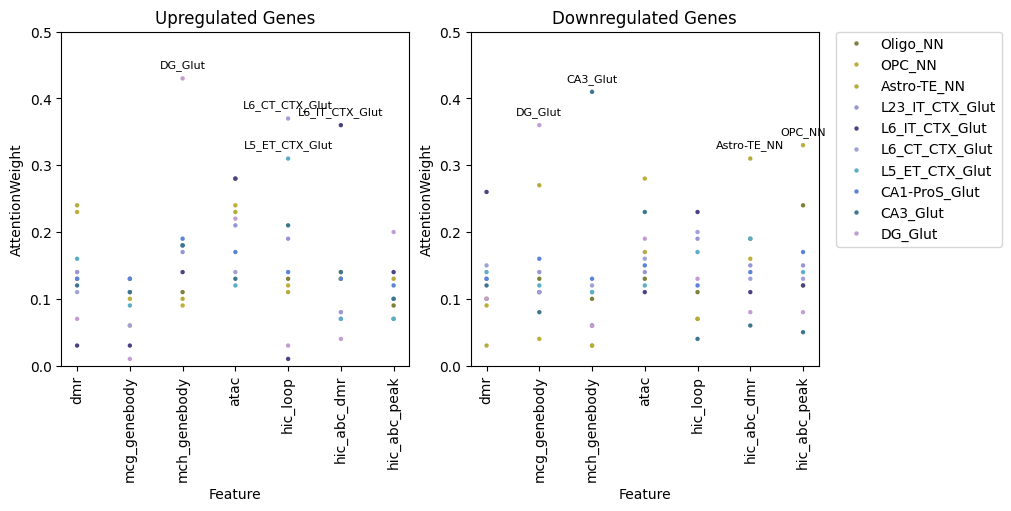

In [5]:
fig, axes = plt.subplots(figsize=(10, 5), ncols = 2, dpi = 100, constrained_layout=True)

ax = axes[0]
tmp_all_toplot = all_toplot[all_toplot['DEG'] == 1]
sns.scatterplot(data = tmp_all_toplot, 
                x = 'Feature', 
                y = 'AttentionWeight', 
                hue = 'CellType', 
                ax = ax,
                linewidth = 0, s = 10,
                palette = new_ct_paltette,
                )

ax.set_ylim(0,0.5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.legend([],[], frameon=False)
ax.set_title('Upregulated Genes')

# for cell_type in tmp_all_toplot['CellType'].unique():
#     tmp = tmp_all_toplot[tmp_all_toplot['CellType'] == cell_type]
#     # annotate the point with the max attention weight
#     max_attention_weight_idx = tmp['AttentionWeight'].idxmax()
#     feature = tmp.loc[max_attention_weight_idx, 'Feature']
#     ax.text(feature, 
#             tmp.loc[max_attention_weight_idx, 'AttentionWeight'] + 0.02,
#             cell_type,
#             ha='center',
#             va='center',
#             fontsize=8)
for i in range(len(tmp_all_toplot)):
    if tmp_all_toplot.iloc[i]['AttentionWeight'] > 0.3:
        ax.text(tmp_all_toplot.iloc[i]['Feature'], 
                tmp_all_toplot.iloc[i]['AttentionWeight'] + 0.02,
                tmp_all_toplot.iloc[i]['CellType'],
                ha='center',
                va='center',
                fontsize=8)

ax = axes[1]
tmp_all_toplot = all_toplot[all_toplot['DEG'] == -1]
sns.scatterplot(data = tmp_all_toplot, 
                x = 'Feature', 
                y = 'AttentionWeight', 
                hue = 'CellType', 
                ax = ax,
                linewidth = 0, s = 10,
                palette = new_ct_paltette,
                )

ax.set_ylim(0,0.5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.legend([],[], frameon=False)
ax.set_title('Downregulated Genes')

for i in range(len(tmp_all_toplot)):
    if tmp_all_toplot.iloc[i]['AttentionWeight'] > 0.3:
        ax.text(tmp_all_toplot.iloc[i]['Feature'], 
                tmp_all_toplot.iloc[i]['AttentionWeight'] + 0.02,
                tmp_all_toplot.iloc[i]['CellType'],
                ha='center',
                va='center',
                fontsize=8)

# plot legend outside, and legend fontsize as 10
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.001)
#fig.savefig(f"figure/scatterplot_attention_weight.pdf", bbox_inches='tight')
plt.show()

## heatmap

In [6]:
all_toplot= [] 
for path in all_fps:
    ct = path.split('/')[-2]
    ml_out = pd.read_csv(path)
    right_pred = ml_out[ml_out['pred'] == ml_out['DEG']].sort_values('DEG')
    toplot= right_pred.set_index('gene')[['dmr', 'mcg_genebody', 'mch_genebody', 'atac',
                'hic_loop', 'hic_abc_dmr', 'hic_abc_peak','DEG']]
    toplot = toplot.groupby('DEG').mean()
    toplot = round(toplot,2)
    toplot = toplot.loc[[-1,1]]
    toplot['CellType'] = ct
    all_toplot.append(toplot)
    # change to long format
    #toplot = toplot.reset_index().melt(id_vars='DEG', var_name='Feature', value_name='AttentionWeight')
    
all_toplot = pd.concat(all_toplot)
all_toplot.head()

,dmr,mcg_genebody,mch_genebody,atac,hic_loop,hic_abc_dmr,hic_abc_peak,CellType
DEG,,,,,,,,
-1,0.10,0.13,0.10,0.13,0.11,0.19,0.24,Oligo_NN
1,0.13,0.13,0.11,0.28,0.13,0.13,0.09,Oligo_NN
-1,0.09,0.04,0.03,0.28,0.07,0.16,0.33,OPC_NN
1,0.23,0.10,0.09,0.24,0.12,0.14,0.07,OPC_NN
-1,0.03,0.27,0.03,0.17,0.07,0.31,0.12,Astro-TE_NN


In [7]:
up_toplot = all_toplot[all_toplot.index == 1].set_index('CellType')
down_toplot = all_toplot[all_toplot.index == -1].set_index('CellType')

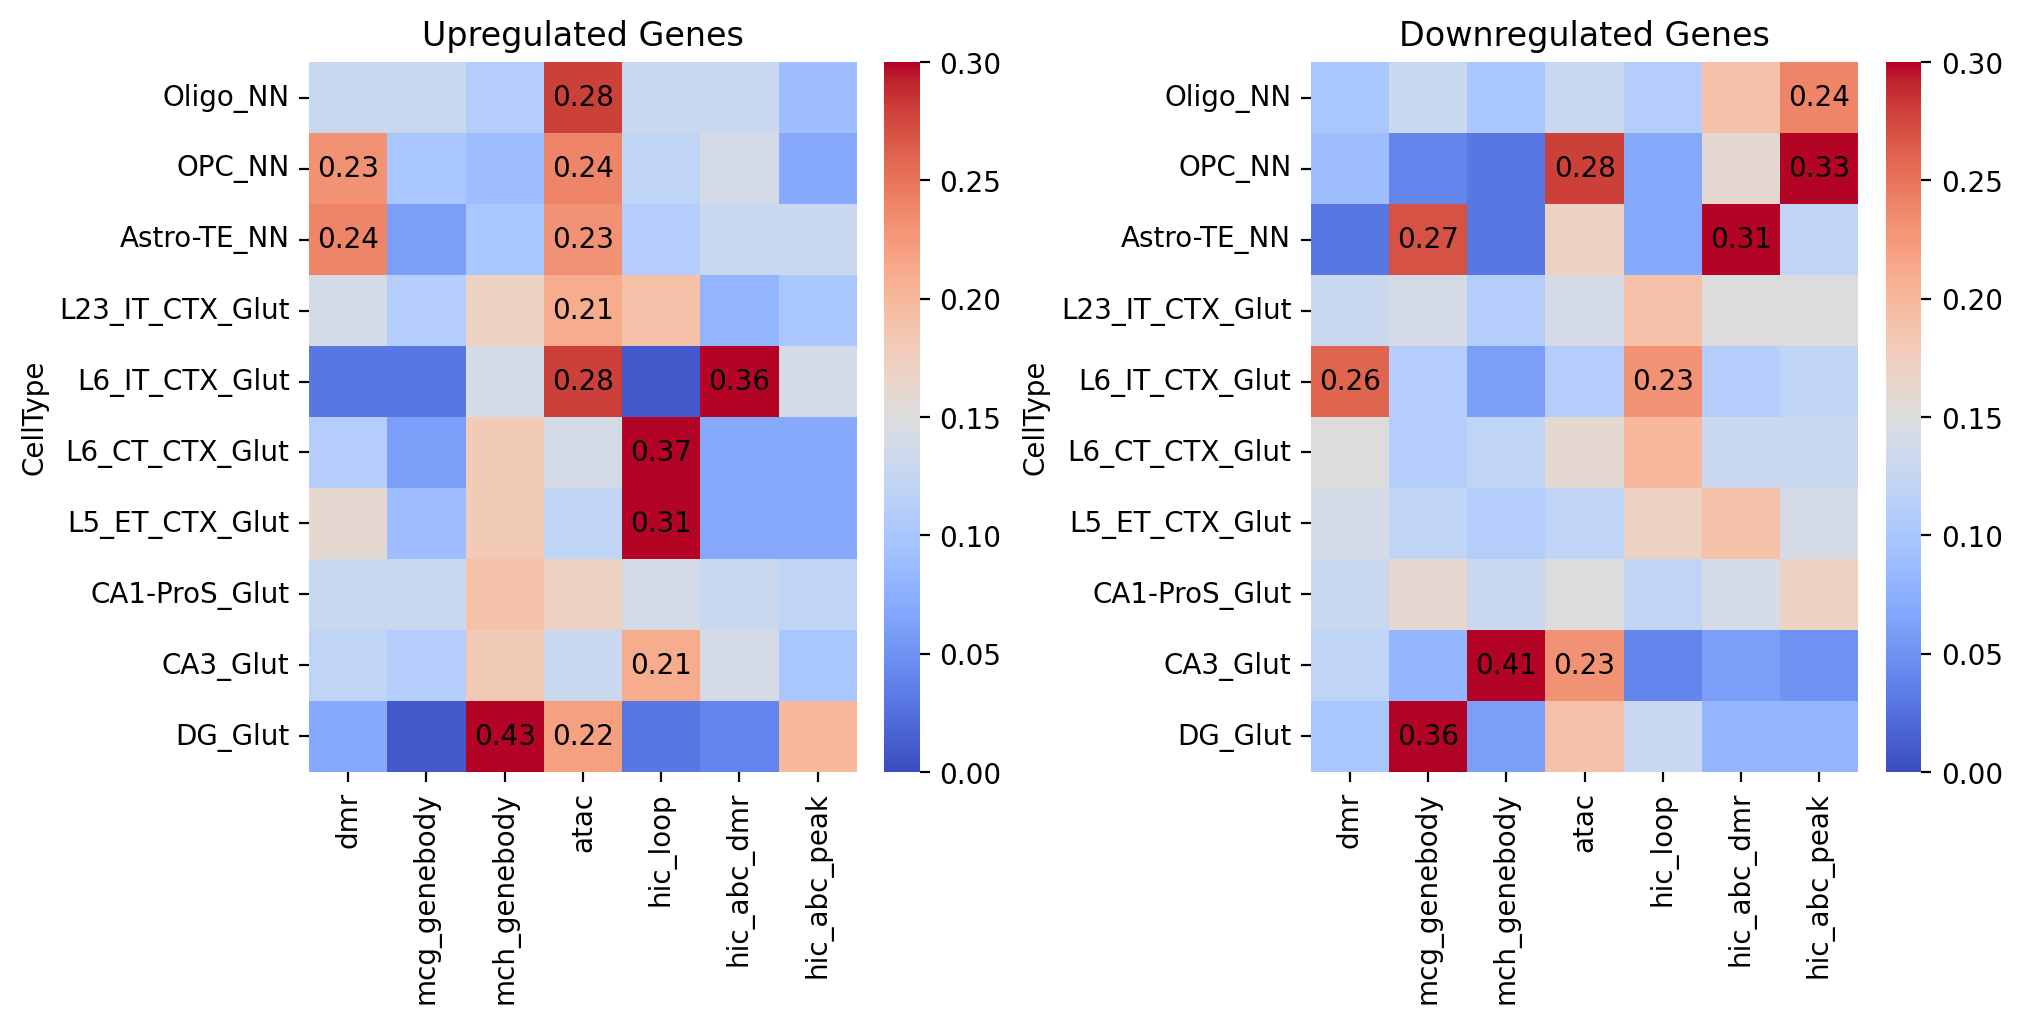

In [11]:
fig, axes = plt.subplots(figsize=(10, 5), ncols = 2, dpi = 200, constrained_layout=True)

ax = axes[0]
sns.heatmap(up_toplot, 
            annot=False, 
            cmap="coolwarm",  
            vmin=0,
            vmax=0.3,
            ax=ax)

for i in range(up_toplot.shape[0]):
    for j in range(up_toplot.shape[1]):
        if up_toplot.iloc[i,j] > 0.2:
            ax.text(j+0.5, i+0.5, round(up_toplot.iloc[i,j], 2), ha='center', va='center', color='black', fontsize=10)
ax.set_title('Upregulated Genes')

ax = axes[1]
sns.heatmap(down_toplot, 
            annot=False, 
            cmap="coolwarm",  
            vmin=0,
            vmax=0.3,
            ax=ax)

for i in range(down_toplot.shape[0]):
    for j in range(down_toplot.shape[1]):
        if down_toplot.iloc[i,j] > 0.2:
            ax.text(j+0.5, i+0.5, round(down_toplot.iloc[i,j], 2), ha='center', va='center', color='black', fontsize=10)

ax.set_title('Downregulated Genes')
fig.savefig(f"figure/heatmap_attention_weight.pdf", bbox_inches='tight')

In [16]:
up_toplot = all_toplot[all_toplot.index == 1].set_index('CellType')
down_toplot = all_toplot[all_toplot.index == -1].set_index('CellType')

In [29]:
up_toplot.describe()

,dmr,mcg_genebody,mch_genebody,atac,hic_loop,hic_abc_dmr,hic_abc_peak
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.136000,0.083000,0.177000,0.202000,0.162000,0.129000,0.109000
std,0.063979,0.041379,0.096385,0.059217,0.112921,0.088751,0.040675
min,0.030000,0.010000,0.090000,0.120000,0.010000,0.040000,0.070000
25%,0.112500,0.060000,0.117500,0.147500,0.112500,0.072500,0.075000
50%,0.130000,0.095000,0.175000,0.215000,0.135000,0.130000,0.100000
75%,0.155000,0.110000,0.180000,0.237500,0.205000,0.137500,0.127500
max,0.240000,0.130000,0.430000,0.280000,0.370000,0.360000,0.200000


In [28]:
down_toplot.describe()

,dmr,mcg_genebody,mch_genebody,atac,hic_loop,hic_abc_dmr,hic_abc_peak
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.125000,0.152000,0.116000,0.168000,0.133000,0.152000,0.153000
std,0.058357,0.094375,0.109565,0.052873,0.063078,0.069889,0.080284
min,0.030000,0.040000,0.030000,0.110000,0.040000,0.060000,0.050000
25%,0.100000,0.110000,0.060000,0.132500,0.080000,0.115000,0.120000
50%,0.125000,0.125000,0.105000,0.155000,0.125000,0.145000,0.135000
75%,0.137500,0.155000,0.117500,0.185000,0.185000,0.182500,0.165000
max,0.260000,0.360000,0.410000,0.280000,0.230000,0.310000,0.330000
